In [1]:
%load_ext autoreload
%autoreload 2

# Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hist3d import histogram_3d
import warnings

In [3]:
warnings.filterwarnings('ignore')

# Load Data

In [4]:
f1 = '10G0502'
f2 = '10G2603'
d1 = np.loadtxt('sample_data/10G0502.MTS.txt')
d2 = np.loadtxt('sample_data/10G2603.MTS.txt')
n_fish = 10
t_int = 1/25

### Get x,y points and reshape (no_of_frames, no_of_fish)

In [5]:
x1, y1 = d1.T[1:3]
x1 = x1.reshape((len(x1)//n_fish, n_fish))
y1 = y1.reshape((len(y1)//n_fish, n_fish))

x2, y2 = d2.T[1:3]
x2 = x2.reshape((len(x2)//n_fish, n_fish))
y2 = y2.reshape((len(y2)//n_fish, n_fish))

# Plot Mx, My hist heatmap of data
> ## Since, the data is of the same type of fish and is recorded from a controlled experimantal setup,we expect it to have similar charactersitcs

In [6]:
def pol(x,y,t_int=t_int):
    vel_x = np.diff(x.round(), axis=0)/t_int
    vel_y = np.diff(y.round(), axis=0)/t_int
    vel = np.sqrt(vel_x**2 + vel_y**2)
    mx = vel_x/vel
    mx[np.isnan(mx)] = 0
    my = vel_y/vel
    my[np.isnan(my)] = 0
    Mx = np.mean(mx, axis=1)
    My = np.mean(my, axis=1)
    M = np.sqrt(Mx**2 + My**2)
    return Mx, My, M

In [7]:
Mx1, My1, M1 = pol(x1, y1)
Mx2, My2, M2 = pol(x2, y2)

Text(0.5, 1.0, '10G2603; |M|=0.356')

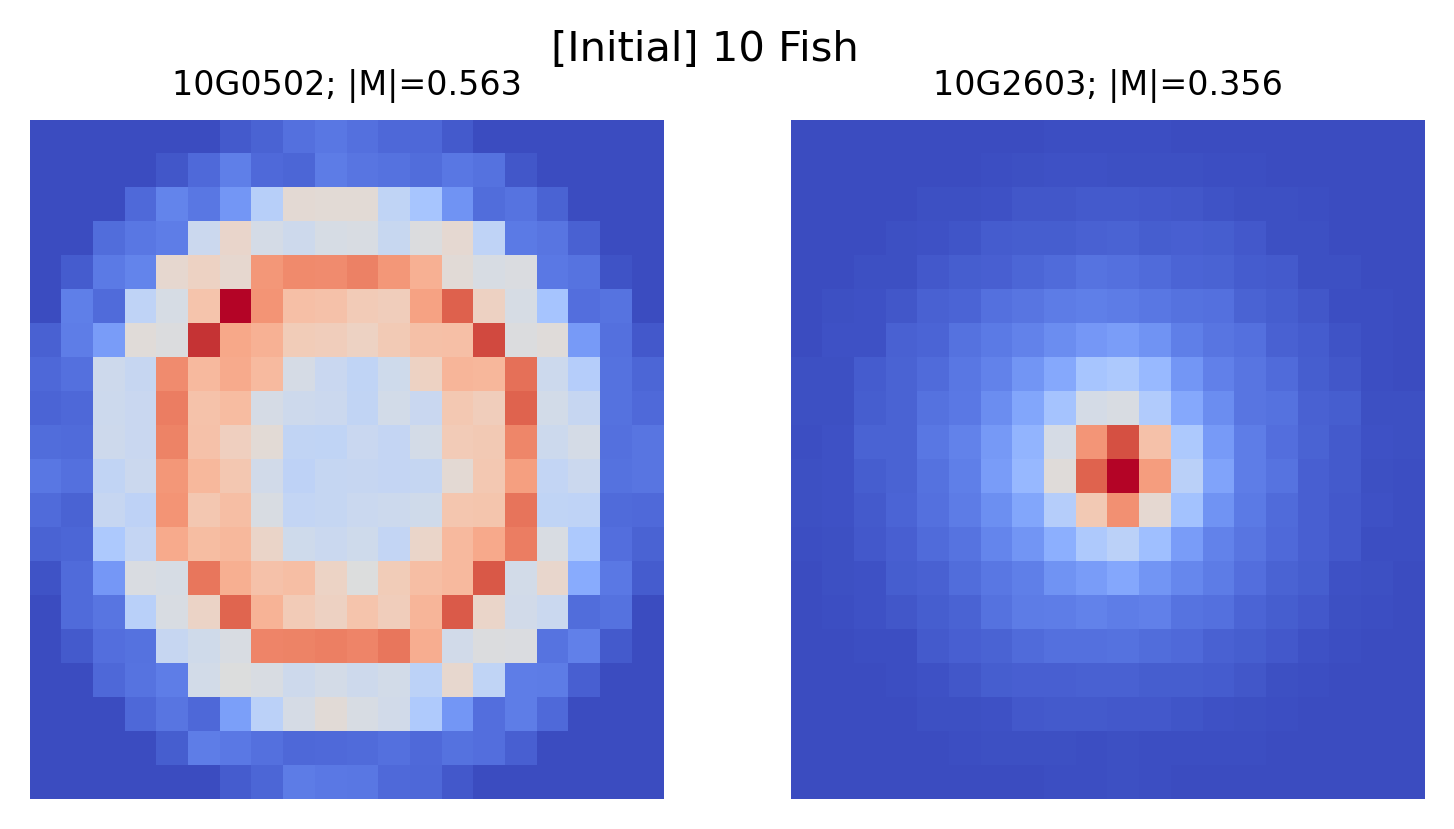

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), dpi=300)
fig.suptitle('[Initial] 10 Fish', fontsize=10)
H, edges, X, Y, Z, dx, dy, dz = histogram_3d(np.array([Mx1, My1]))
bin_count = int(np.sqrt(len(dz)))
dz = dz.reshape((bin_count, bin_count))
ax[0].xaxis.set_major_locator(plt.NullLocator())
ax[0].yaxis.set_major_locator(plt.NullLocator())
sns.heatmap(dz,xticklabels=[], yticklabels=[],cmap=plt.cm.coolwarm,cbar=False, ax=ax[0])
M1 = M1.mean().round(3)
ax[0].set_title("{}; |M|={}".format(f1, M1), fontsize=8)


H, edges, X, Y, Z, dx, dy, dz = histogram_3d(np.array([Mx2, My2]))
bin_count = int(np.sqrt(len(dz)))
dz = dz.reshape((bin_count, bin_count))
ax[1].xaxis.set_major_locator(plt.NullLocator())
ax[1].yaxis.set_major_locator(plt.NullLocator())
sns.heatmap(dz,xticklabels=[], yticklabels=[],cmap=plt.cm.coolwarm,cbar=False, ax=ax[1])
M2 = M2.mean().round(3)
ax[1].set_title("{}; |M|={}".format(f2, M2), fontsize=8)

> ## But, contarary to our expectations, its clear from the figure above that the two files show different characterstics

# Plot x,y trajectories
> ## From the x,y trajectories plots, we can see that there the there is mismatch in the tracking ID and the tracked coordinates

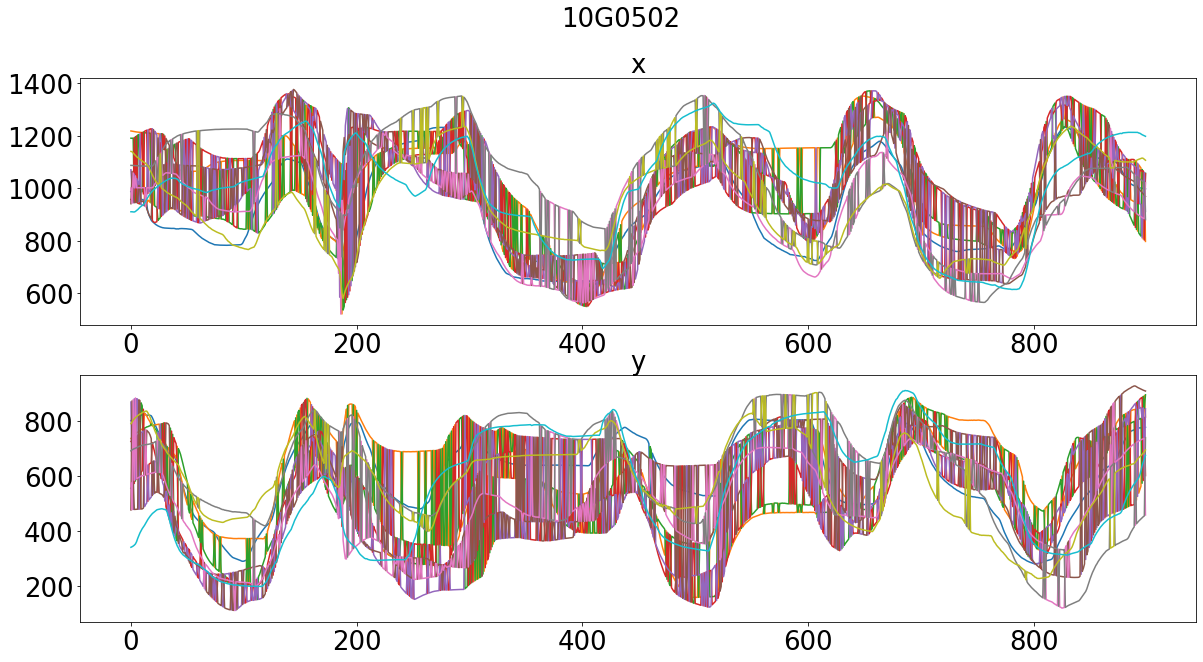

In [9]:
fig = plt.figure(figsize=(20,10))
plt.suptitle(f1, fontsize=26)
plt.subplot(2,1,1)
plt.title('x', fontsize=26)
plt.plot(x1[100:1000])
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.subplot(2,1,2)
plt.title('y', fontsize=26)
plt.plot(y1[100:1000])
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.show()

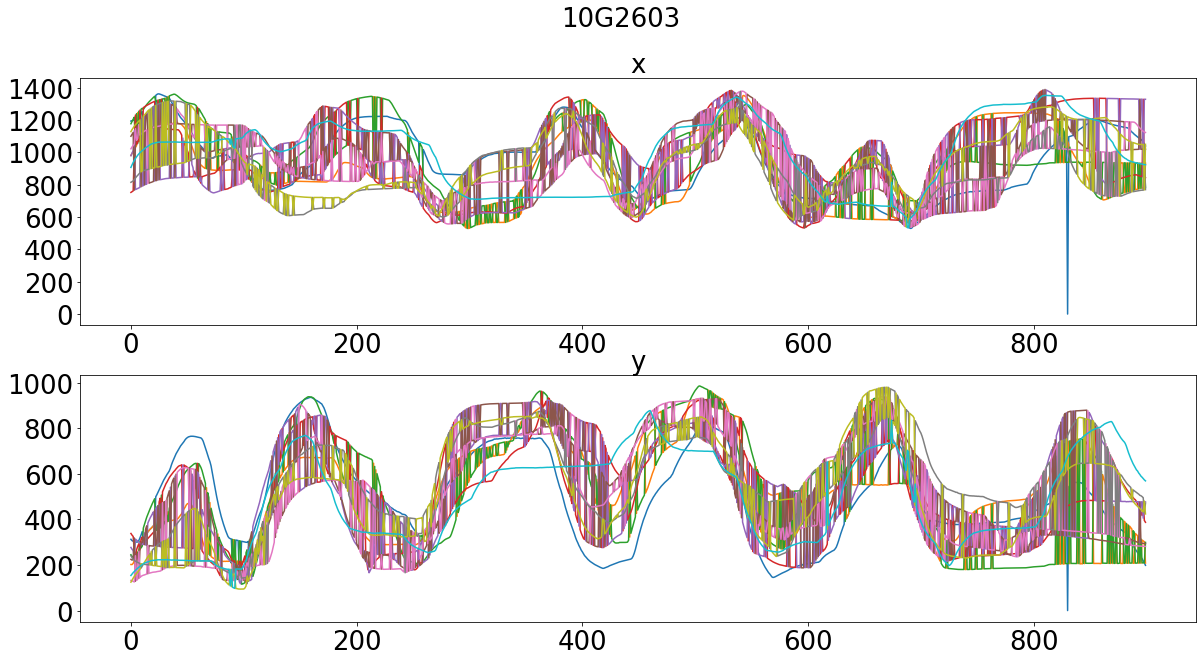

In [10]:
fig = plt.figure(figsize=(20,10))
plt.suptitle(f2, fontsize=26)
plt.subplot(2,1,1)
plt.title('x', fontsize=26)
plt.plot(x2[100:1000])
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.subplot(2,1,2)
plt.title('y', fontsize=26)
plt.plot(y2[100:1000])
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.show()

> ## Thus, corrections need to be done to the data.